In [49]:
import numpy as np # linear algebra
import pandas as pd # data processing
from google.colab import drive
drive.mount('/content/gdrive')
df=pd.read_csv('gdrive/My Drive/ObesityDataSet_raw_and_data_sinthetic.csv')
df.head()

Mounted at /content/gdrive


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [11]:
df.isnull().sum()

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [12]:
df.drop_duplicates(inplace=True)
dfcat=df.select_dtypes(exclude='number') # selecting only categorical features
dfcat.head()

,Gender,CALC,FAVC,SCC,SMOKE,family_history_with_overweight,CAEC,MTRANS,NObeyesdad
0,Female,no,no,no,no,yes,Sometimes,Public_Transportation,Normal_Weight
1,Female,Sometimes,no,yes,yes,yes,Sometimes,Public_Transportation,Normal_Weight
2,Male,Frequently,no,no,no,yes,Sometimes,Public_Transportation,Normal_Weight
3,Male,Frequently,no,no,no,no,Sometimes,Walking,Overweight_Level_I
4,Male,Sometimes,no,no,no,no,Sometimes,Public_Transportation,Overweight_Level_II


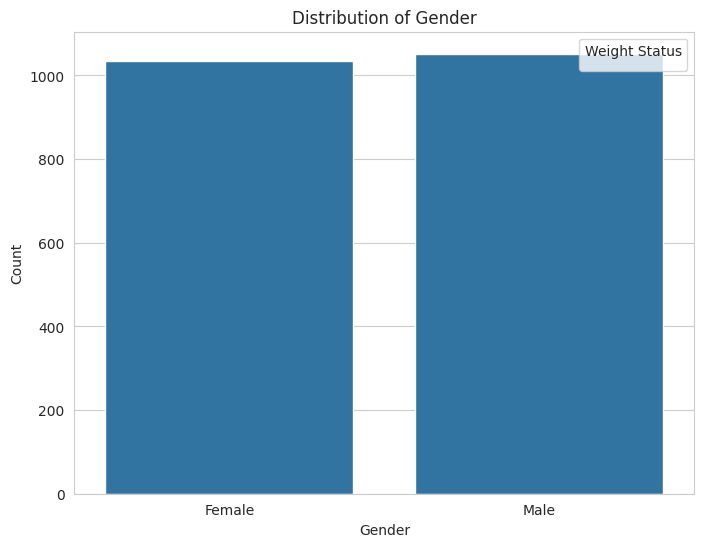

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plots
sns.set_style("whitegrid")

# Plot : Bar chart for Gender
plt.figure(figsize=(8, 6))
sns.countplot(data=dfcat, x="Gender")
plt.title("Distribution of Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Weight Status")
plt.show()

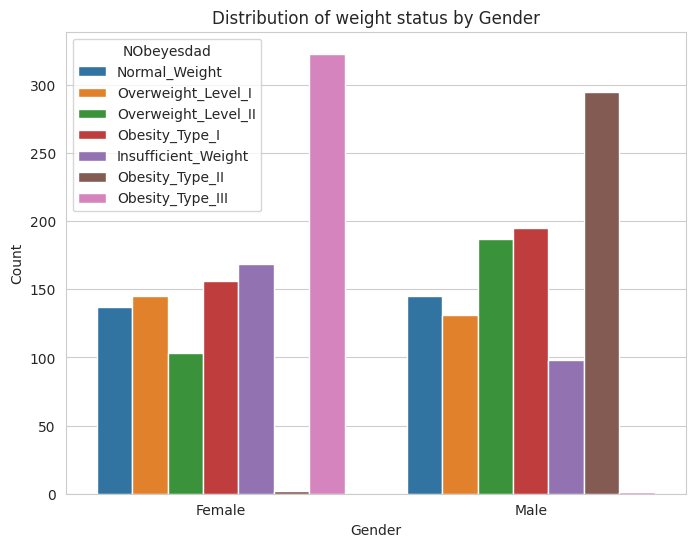

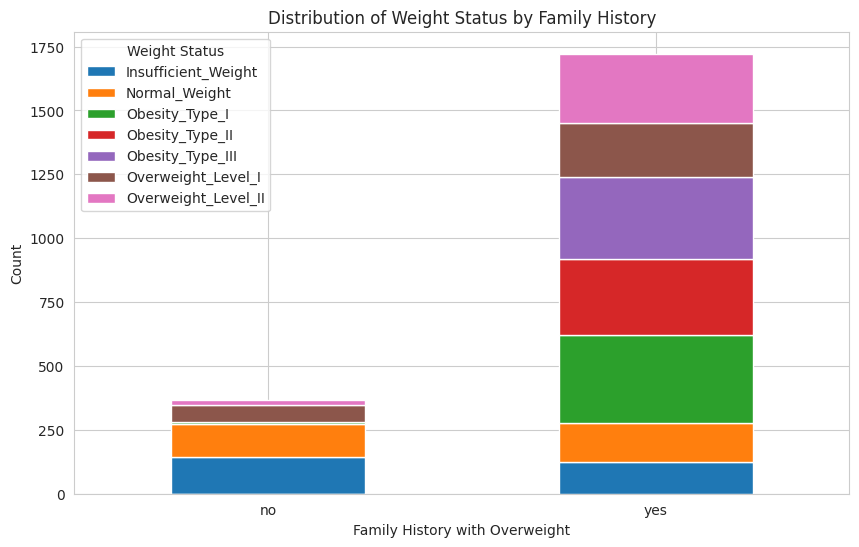

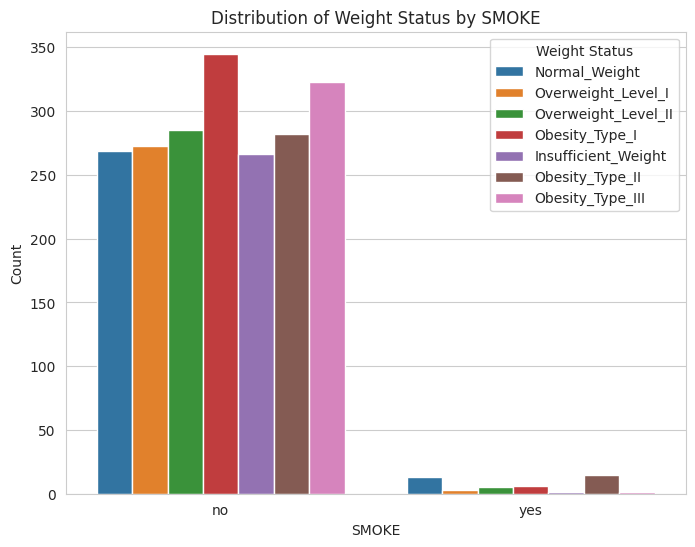

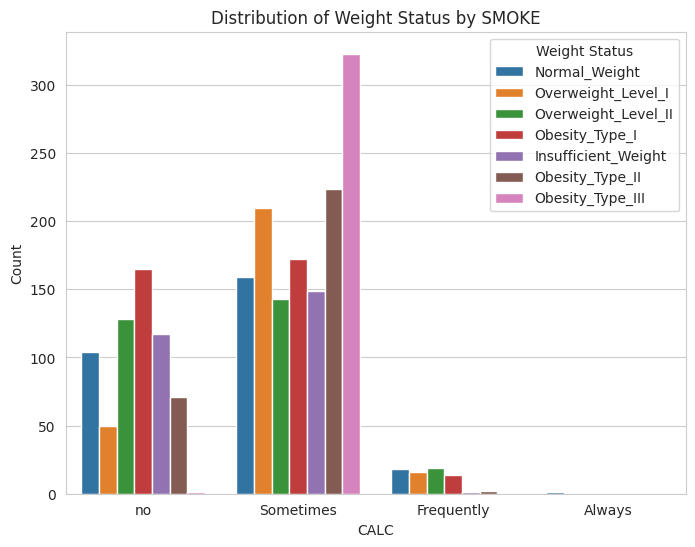

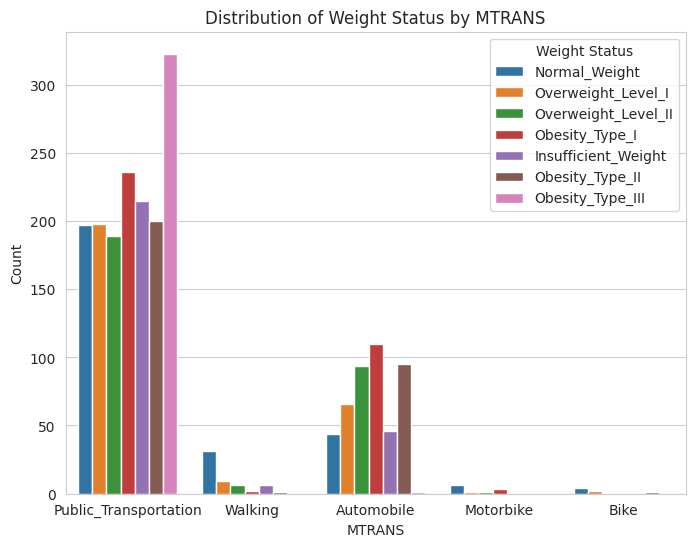

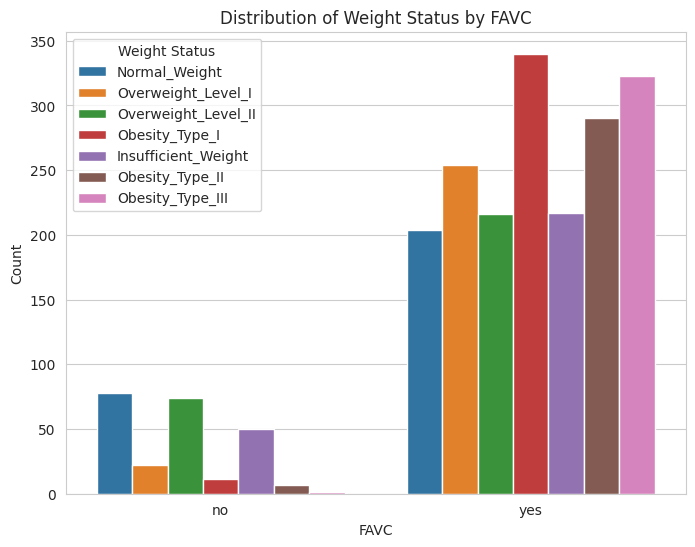

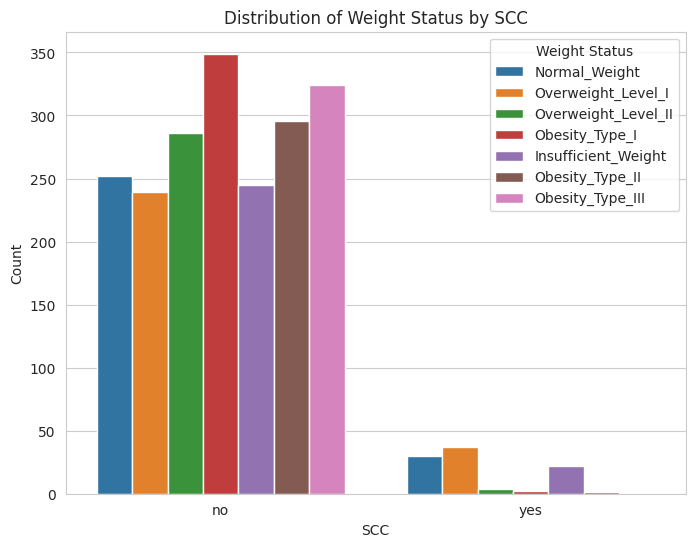

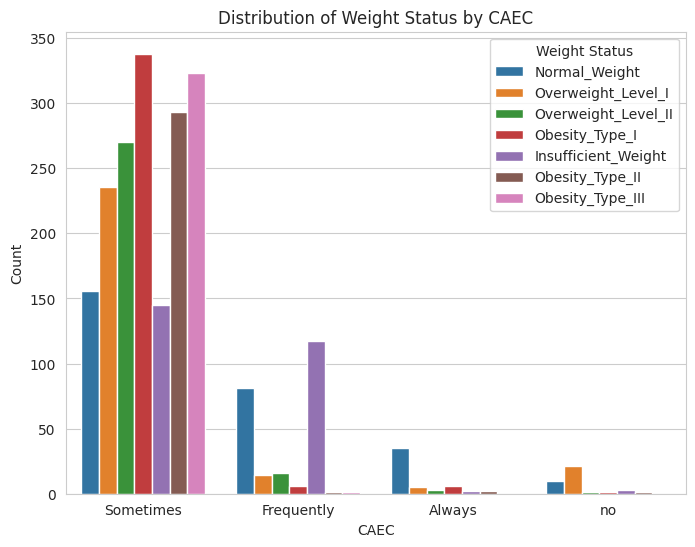

In [57]:
# Plot 1: Bar plot showing the distribution of weight status by gender
plt.figure(figsize=(8, 6))
sns.countplot(data=dfcat, x="Gender",hue='NObeyesdad')
plt.title("Distribution of weight status by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# Plot 2: Stacked bar chart for family_history_with_overweight and NObeyesdad
cross_tab = pd.crosstab(dfcat["family_history_with_overweight"], df["NObeyesdad"])
cross_tab.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Distribution of Weight Status by Family History")
plt.xlabel("Family History with Overweight")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Weight Status")
plt.show()

# Plot 3: Bar plot showing the relationship between smoke and NObeyesdad
plt.figure(figsize=(8, 6))
sns.countplot(data=dfcat, x='SMOKE', hue="NObeyesdad")
plt.title("Distribution of Weight Status by SMOKE")
plt.xlabel("SMOKE")
plt.ylabel("Count")
plt.legend(title="Weight Status")
plt.show()

# Plot 4: Bar plot showing the relationship between CALC and NObeyesdad
plt.figure(figsize=(8, 6))
sns.countplot(data=dfcat, x='CALC', hue="NObeyesdad")
plt.title("Distribution of Weight Status by SMOKE")
plt.xlabel("CALC")
plt.ylabel("Count")
plt.legend(title="Weight Status")
plt.show()

# Plot 5: Bar plot showing the relationship between Gender and NObeyesdad
plt.figure(figsize=(8, 6))
sns.countplot(data=dfcat, x='MTRANS', hue="NObeyesdad")
plt.title("Distribution of Weight Status by MTRANS")
plt.xlabel('MTRANS')
plt.ylabel("Count")
plt.legend(title="Weight Status")
plt.show()

# Plot 6: Bar plot showing the relationship between FAVC and NObeyesdad
plt.figure(figsize=(8, 6))
sns.countplot(data=dfcat, x='FAVC', hue="NObeyesdad")
plt.title("Distribution of Weight Status by FAVC")
plt.xlabel("FAVC")
plt.ylabel("Count")
plt.legend(title="Weight Status")
plt.show()

# Plot 7: Bar plot showing the relationship between SCC and NObeyesdad
plt.figure(figsize=(8, 6))
sns.countplot(data=dfcat, x='SCC', hue="NObeyesdad")
plt.title("Distribution of Weight Status by SCC")
plt.xlabel("SCC")
plt.ylabel("Count")
plt.legend(title="Weight Status")
plt.show()

# Plot 8: Bar plot showing the relationship between CAEC and NObeyesdad
plt.figure(figsize=(8, 6))
sns.countplot(data=dfcat, x='CAEC', hue="NObeyesdad")
plt.title("Distribution of Weight Status by CAEC")
plt.xlabel("CAEC")
plt.ylabel("Count")
plt.legend(title="Weight Status")
plt.show()

In [21]:
dfnum=df.select_dtypes(exclude='object') # selecting only numerical features
dfnum.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,24.353090,1.702674,86.858730,2.421466,2.701179,2.004749,1.012812,0.663035
std,6.368801,0.093186,26.190847,0.534737,0.764614,0.608284,0.853475,0.608153
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.915937,1.630178,66.000000,2.000000,2.697467,1.590922,0.124505,0.000000
50%,22.847618,1.701584,83.101100,2.396265,3.000000,2.000000,1.000000,0.630866
75%,26.000000,1.769491,108.015907,3.000000,3.000000,2.466193,1.678102,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [22]:
target=df["NObeyesdad"]

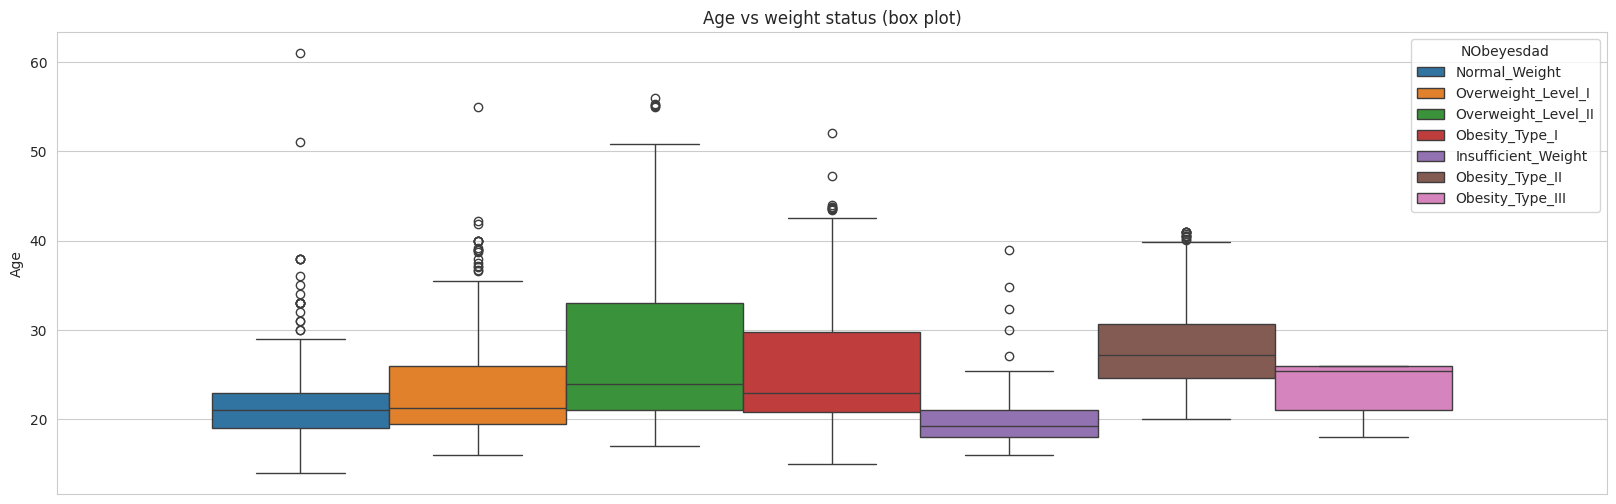

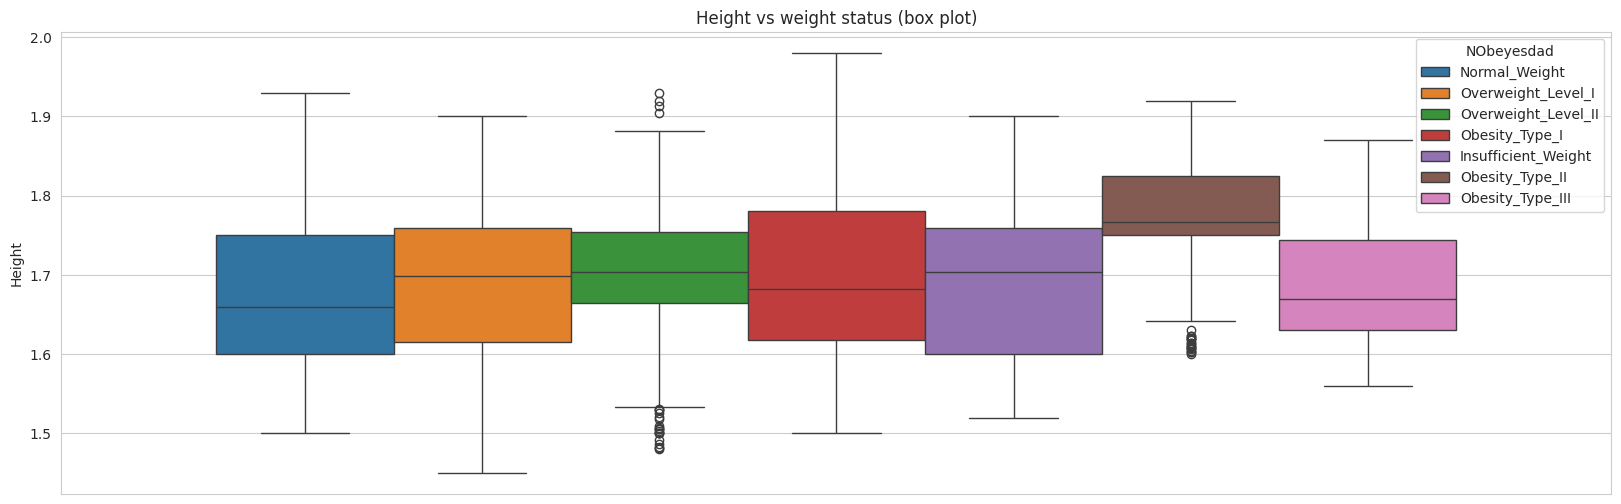

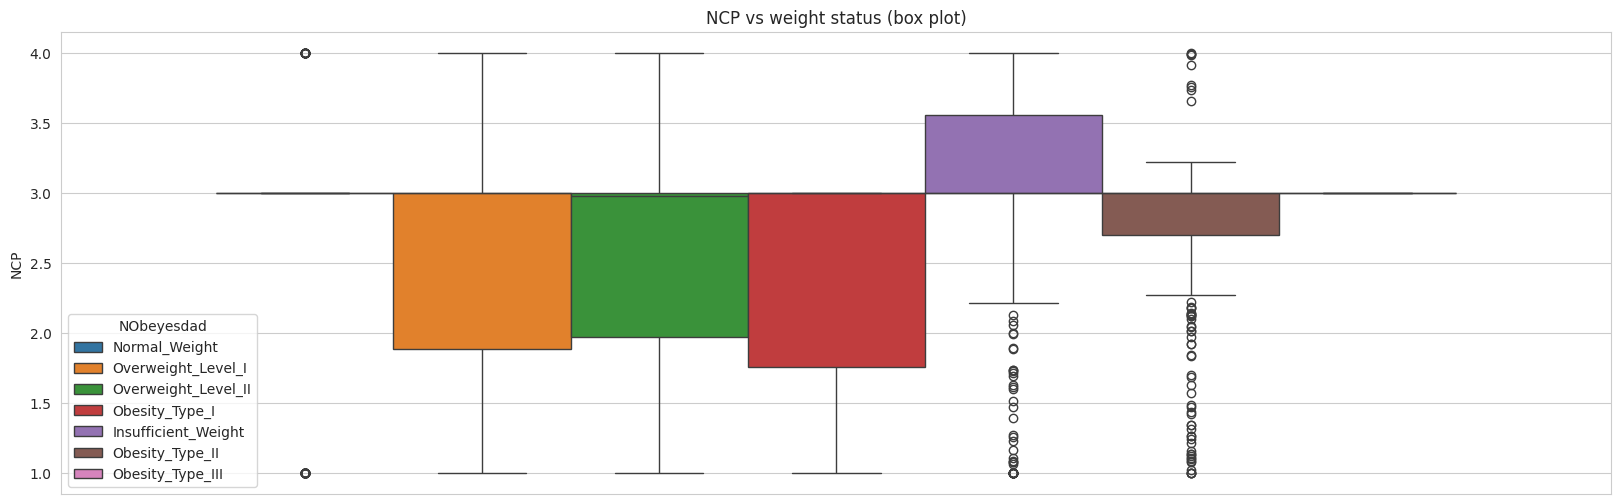

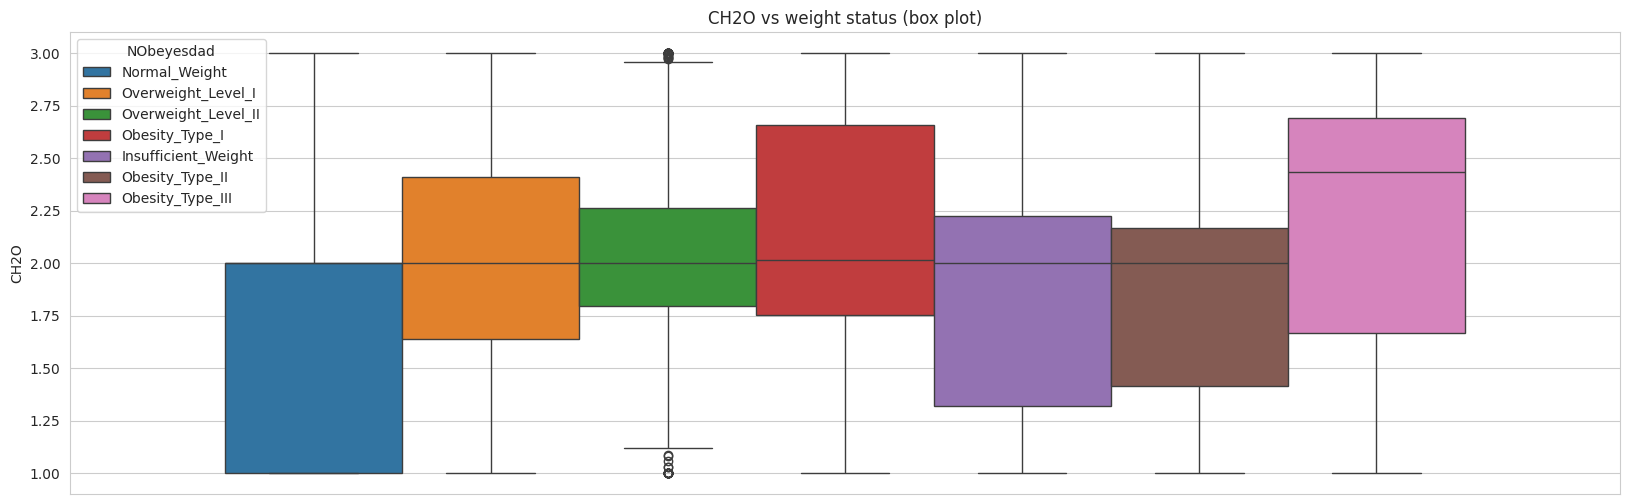

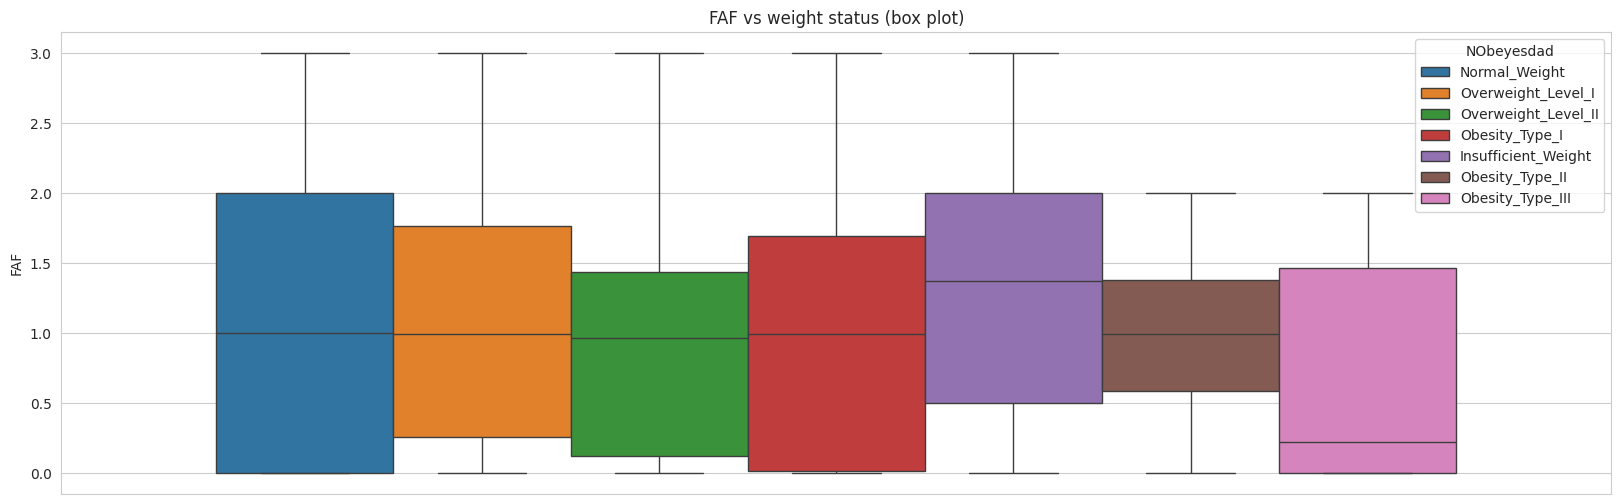

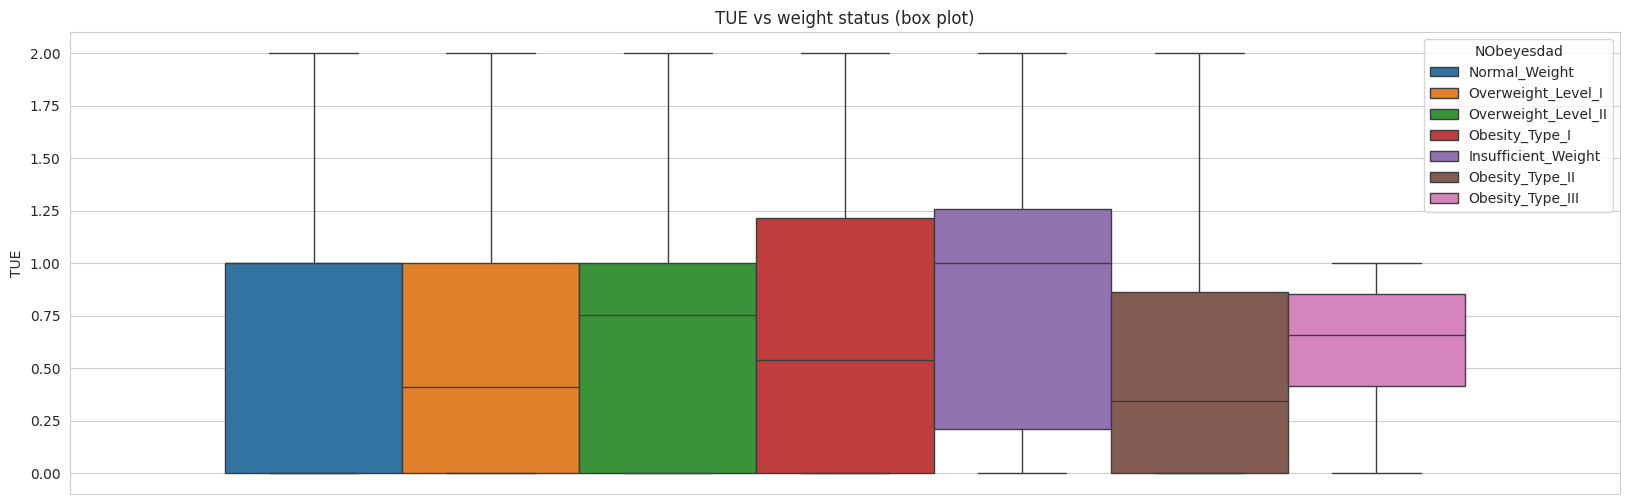

In [29]:
plt.figure(figsize=(20, 6))
sns.boxplot(data=dfnum, hue=target, y="Age")
plt.title("Age vs weight status (box plot)")
plt.show()

plt.figure(figsize=(20, 6))
sns.boxplot(data=dfnum, hue=target, y="Height")
plt.title("Height vs weight status (box plot)")
plt.show()

plt.figure(figsize=(20, 6))
sns.boxplot(data=dfnum, hue=target, y="NCP")
plt.title("NCP vs weight status (box plot)")
plt.show()

plt.figure(figsize=(20, 6))
sns.boxplot(data=dfnum, hue=target, y="CH2O")
plt.title("CH2O vs weight status (box plot)")
plt.show()

plt.figure(figsize=(20, 6))
sns.boxplot(data=dfnum, hue=target, y="FAF")
plt.title("FAF vs weight status (box plot)")
plt.show()

plt.figure(figsize=(20, 6))
sns.boxplot(data=dfnum, hue=target, y="TUE")
plt.title("TUE vs weight status (box plot)")
plt.show()

In [59]:
# Hybrid model approach combining FNN and GRU

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, GRU, concatenate, Reshape, Add
from tensorflow.keras.models import Model
# Data Preprocessing
# Encode the categorical target variable because model cannot train on categorical variables
# so they are needed to be encoded in numerical form
label_encoder = LabelEncoder()
df['NObeyesdad'] = label_encoder.fit_transform(df['NObeyesdad'])

# Split data into features (X) and target variable (y)
X = df.drop(columns=['NObeyesdad'])
y = df['NObeyesdad']


# Perform one-hot encoding for categorical variables because categorical features need
#encoding and one-hot is a good way because it encode in such a way that variables do not lose their original classes
X = pd.get_dummies(X)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by making the mean = 0 and standard deviation = 1 so that all features
# have same scale. This will eliminate biasness in model by making influence of each feature equal.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = label_encoder.fit_transform(y_train)
y_test= label_encoder.transform(y_test)


# Find the indices of categorical columns
categorical_indices = np.where(np.any(np.isnan(X_train), axis=0))[0]

# Find the indices of numerical columns
numerical_indices = np.where(np.all(np.isfinite(X_train), axis=0))[0]

# Separate categorical and numerical features for training data
X_train_categorical = X_train[:, categorical_indices]
X_train_numerical = X_train[:, numerical_indices]

# Separate categorical and numerical features for testing data
X_test_categorical = X_test[:, categorical_indices]
X_test_numerical = X_test[:, numerical_indices]


# Define the GRU model for processing categorical features because it is well suited for sequential data but
# we do not have sequential data and from categorical and numerical types categorical is more suited for GRU
input_categorical = Input(shape=(X_train_categorical.shape[1],))
# Reshaping because GRU is built for sequential data and expects 3D data containing timestamps
#and batch_size so we have to reshape our categorical data and needed to add more dimensions so
#it will work with GRU model architecture
reshape_categorical = Reshape((1, X_train_categorical.shape[1]))(input_categorical)
gru_output = GRU(32)(reshape_categorical)
gru_model = Model(inputs=input_categorical, outputs=gru_output)

# Define the FNN model for processing numerical features because FNN is best suited for tabular data type
input_numerical = Input(shape=(X_train_numerical.shape[1],))
dense1_numerical = Dense(64, activation='relu')(input_numerical)
dense2_numerical = Dense(64, activation='relu')(dense1_numerical)
fnn_model = Model(inputs=input_numerical, outputs=dense2_numerical)

# Combine the outputs of both models
combined_output = concatenate([gru_model.output, fnn_model.output])
dense1_combined = Dense(64, activation='relu')(combined_output)
output = Dense(7, activation='softmax')(dense1_combined)  # 7 output neurons because we have 7 classes of our target variable

# Define the hybrid model
hybrid_model = Model(inputs=[input_categorical, input_numerical], outputs=output)

# Compile the hybrid model
hybrid_model.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

# Train the hybrid model
hybrid_model.fit([X_train_categorical, X_train_numerical], y_train, epochs=50, batch_size=32, validation_split=0.1)

# Make predictions on test data
y_pred = hybrid_model.predict([X_test_categorical, X_test_numerical])
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert true labels to categorical
y_test_categorical = label_encoder.inverse_transform(y_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_categorical, y_pred_classes)
precision = precision_score(y_test_categorical, y_pred_classes, average='macro')
recall = recall_score(y_test_categorical, y_pred_classes, average='macro')
f1 = f1_score(y_test_categorical, y_pred_classes, average='macro')
auc_roc = roc_auc_score(y_test_categorical, y_pred, average='macro', multi_class='ovr')
conf_matrix = confusion_matrix(y_test_categorical, y_pred_classes)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC-ROC:", auc_roc)
print("Confusion Matrix:")
print(conf_matrix)


Epoch 1/50
48/48 [==============================] - 4s 15ms/step - loss: 1.6004 - accuracy: 0.4621 - val_loss: 1.1804 - val_accuracy: 0.5858
Epoch 2/50
48/48 [==============================] - 0s 4ms/step - loss: 0.9805 - accuracy: 0.6544 - val_loss: 0.7906 - val_accuracy: 0.7041
Epoch 3/50
48/48 [==============================] - 0s 4ms/step - loss: 0.7218 - accuracy: 0.7531 - val_loss: 0.6377 - val_accuracy: 0.7515
Epoch 4/50
48/48 [==============================] - 0s 4ms/step - loss: 0.5801 - accuracy: 0.7979 - val_loss: 0.5215 - val_accuracy: 0.8047
Epoch 5/50
48/48 [==============================] - 0s 4ms/step - loss: 0.4768 - accuracy: 0.8413 - val_loss: 0.4387 - val_accuracy: 0.8107
Epoch 6/50
48/48 [==============================] - 0s 4ms/step - loss: 0.3860 - accuracy: 0.8776 - val_loss: 0.3451 - val_accuracy: 0.9112
Epoch 7/50
48/48 [==============================] - 0s 4ms/step - loss: 0.3143 - accuracy: 0.8966 - val_loss: 0.3116 - val_accuracy: 0.9112
Epoch 8/50
48/48 [=

In [56]:
# Stacked model approach stacking first output again as input to the same model

# Combine the outputs of both models
combined_output = concatenate([gru_model.output, fnn_model.output])
dense1_combined = Dense(64, activation='relu')(combined_output)
dense2_combined = Dense(32, activation='relu')(dense1_combined)

# Define the second stage model for classification
input_second_stage = Input(shape=(dense2_combined.shape[1],))
dense_second_stage = Dense(64, activation='relu')(input_second_stage)
output = Dense(7, activation='softmax')(dense_second_stage)

# Define the second stage model
second_stage_model = Model(inputs=input_second_stage, outputs=output)

# Use the output of the first stage as input to the second stage model
output_second_stage = second_stage_model(dense2_combined)

# Define the overall stacked model
stacked_model = Model(inputs=[input_categorical, input_numerical], outputs=output_second_stage)

# Compile the stacked model
stacked_model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

# Train the stacked model
stacked_model.fit([X_train_categorical, X_train_numerical], y_train, epochs=50, batch_size=32, validation_split=0.1)

# Make predictions on test data
y_pred = hybrid_model.predict([X_test_categorical, X_test_numerical])
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert true labels to categorical
y_test_categorical = label_encoder.inverse_transform(y_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_categorical, y_pred_classes)
precision = precision_score(y_test_categorical, y_pred_classes, average='macro')
recall = recall_score(y_test_categorical, y_pred_classes, average='macro')
f1 = f1_score(y_test_categorical, y_pred_classes, average='macro')
auc_roc = roc_auc_score(y_test_categorical, y_pred, average='macro', multi_class='ovr')
conf_matrix = confusion_matrix(y_test_categorical, y_pred_classes)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC-ROC:", auc_roc)
print("Confusion Matrix:")
print(conf_matrix)

Epoch 1/50
47/47 [==============================] - 3s 15ms/step - loss: 1.0915 - accuracy: 0.6571 - val_loss: 0.4800 - val_accuracy: 0.8862
Epoch 2/50
47/47 [==============================] - 0s 4ms/step - loss: 0.2401 - accuracy: 0.9534 - val_loss: 0.2722 - val_accuracy: 0.9102
Epoch 3/50
47/47 [==============================] - 0s 4ms/step - loss: 0.0918 - accuracy: 0.9880 - val_loss: 0.2598 - val_accuracy: 0.9102
Epoch 4/50
47/47 [==============================] - 0s 4ms/step - loss: 0.0517 - accuracy: 0.9933 - val_loss: 0.2127 - val_accuracy: 0.9401
Epoch 5/50
47/47 [==============================] - 0s 4ms/step - loss: 0.0267 - accuracy: 0.9993 - val_loss: 0.2339 - val_accuracy: 0.9341
Epoch 6/50
47/47 [==============================] - 0s 4ms/step - loss: 0.0203 - accuracy: 0.9987 - val_loss: 0.2288 - val_accuracy: 0.9341
Epoch 7/50
47/47 [==============================] - 0s 4ms/step - loss: 0.0169 - accuracy: 0.9967 - val_loss: 0.2798 - val_accuracy: 0.9162
Epoch 8/50
47/47 [=

In [45]:
# Another hybrid model approach combining ResNet and FNN

# ResNet-like architecture for processing categorical features because ResNet is best suited for
# image processing but in our case it it better suited for categorical data instead of numerical features
dense1_categorical = Dense(64, activation='relu')(input_categorical)
dense2_categorical = Dense(64, activation='relu')(dense1_categorical)
residual_categorical = Add()([dense2_categorical, dense1_categorical])  # Residual connection

# Concatenate the outputs of both models
concatenated = concatenate([dense2_numerical, residual_categorical])

# Additional fully connected layers for combined features
dense_combined = Dense(64, activation='relu')(concatenated)
dense_combined = Dense(32, activation='relu')(dense_combined)

# Output layer
output = Dense(7, activation='softmax')(dense_combined)

# Define the hybrid model
hybrid_model = Model(inputs=[input_categorical, input_numerical], outputs=output)

# Compile the model
hybrid_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
hybrid_model.fit([X_train_categorical, X_train_numerical], y_train, epochs=50, batch_size=32, validation_split=0.1)

# Make predictions on test data
y_pred = hybrid_model.predict([X_test_categorical, X_test_numerical])
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert true labels to categorical
y_test_categorical = label_encoder.inverse_transform(y_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_categorical, y_pred_classes)
precision = precision_score(y_test_categorical, y_pred_classes, average='macro')
recall = recall_score(y_test_categorical, y_pred_classes, average='macro')
f1 = f1_score(y_test_categorical, y_pred_classes, average='macro')
auc_roc = roc_auc_score(y_test_categorical, y_pred, average='macro', multi_class='ovr')
conf_matrix = confusion_matrix(y_test_categorical, y_pred_classes)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC-ROC:", auc_roc)
print("Confusion Matrix:")
print(conf_matrix)


Epoch 1/50
47/47 [==============================] - 3s 14ms/step - loss: 1.0962 - accuracy: 0.6751 - val_loss: 0.5849 - val_accuracy: 0.8503
Epoch 2/50
47/47 [==============================] - 0s 5ms/step - loss: 0.3382 - accuracy: 0.9308 - val_loss: 0.3165 - val_accuracy: 0.9401
Epoch 3/50
47/47 [==============================] - 0s 5ms/step - loss: 0.1608 - accuracy: 0.9680 - val_loss: 0.2459 - val_accuracy: 0.9461
Epoch 4/50
47/47 [==============================] - 0s 5ms/step - loss: 0.0948 - accuracy: 0.9827 - val_loss: 0.2807 - val_accuracy: 0.9281
Epoch 5/50
47/47 [==============================] - 0s 3ms/step - loss: 0.0658 - accuracy: 0.9887 - val_loss: 0.2870 - val_accuracy: 0.9281
Epoch 6/50
47/47 [==============================] - 0s 3ms/step - loss: 0.0421 - accuracy: 0.9933 - val_loss: 0.2382 - val_accuracy: 0.9281
Epoch 7/50
47/47 [==============================] - 0s 3ms/step - loss: 0.0291 - accuracy: 0.9973 - val_loss: 0.2392 - val_accuracy: 0.9401
Epoch 8/50
47/47 [=